<center>
<img src="download.png" alt="Alternative text" />
<h1>Credit Card Prediction</h1>
</center>

<h2>Introduction</h2>

Customer churn is a critical issue impacting enterprises and organizations, particularly in highly competitive industry like banks, i.e. customers closing their accounts and having fewer transactions/interactions over time.

customers usually offer some warning before being churned, hence churn prediction systems primarily focus on customer behavior to identify specific customers who are likely to churn out and indicate reasons for the churn. Such factors would aid marketing to develop effective retention strategies, increasing overall customer lifetime value, and assisting in growing the company’s market value.

<h2>Objective</h2>

Build a machine learning based classifer that can determine whether customers will leave or not 

<h2>Data</h2>

<h3>1. Data Description</h3>

Data is from an open-source dataset from Kaggle: (https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction/data)

The dataset contains 10127 sample points with 21 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


- `CLIENTNUM`: Client number. Unique identifier for the customer holding the account (No effect on churn, will drop)
- `Attrition_Flag`: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" (will change it to 1 or 0)
- `Customer_Age`:  Customer's Age in Years (older customers are less likely to close the account than younger ones)  
- `Gender`:  Gender of the account holder: M=Male, F=Female (May plays a role on churn)
- `Dependent_count`: Number of dependents (May effect on churn)   
- `Education_Level`: Educational Qualification of the account holder: Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.  (May plays a role on churn)
- `Marital_Status`: Marital Status of the account holder: Married, Single, Divorced, Unknown
- `Income_Category`: Annual Income Category of the account holder: < $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown 
- `Card_Category`: Type of Card (Blue, Silver, Gold, Platinum).
- `Months_on_book`: Period of relationship with bank
- `Total_Relationship_Count`: Total no. of products held by the customer
- `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
- `Contacts_Count_12_mon`: No. of Contacts in the last 12 months
- `Credit_Limit`: Credit Limit on the Credit Card
- `Total_Revolving_Bal`: The balance that carries over from one month to the next is the revolving balance
- `Avg_Open_To_Buy`: The amount left on the credit card to use (Average of last 12 months)
- `Total_Amt_Chng_Q4_Q1`: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- `Total_Trans_Amt`: Total Transaction Amount (Last 12 months)
- `Total_Trans_Ct`: Total Transaction Count (Last 12 months)
- `Total_Ct_Chng_Q4_Q1`: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- `Avg_Utilization_Ratio`: Average Card Utilization Ratio: how much of the available credit the customer spent

                    

<h3>2. Load Libraries</h3>

In [351]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

#Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    auc,
    roc_curve,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
#segmentation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<h3>3. Read Dataset</h3>

In [352]:
df = pd.read_csv('BankChurners2.csv')


In [353]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [354]:
df.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  

[3 rows x 21 columns]

In [355]:
df.shape

(10127, 21)

In [356]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [206]:
#duplicate values
df.duplicated().sum()

0

In [357]:
#finding the null values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [358]:
#percentage of missing values
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [24]:
#statistical summary of the numerical columns in the data
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

####  Observations:

* There are 10127 rows and 21 columns.
* All the columns have 10127 non-null values except Education Level and Marital Status.
* Education Level has 15% missing values and Marital status has 7.4% missing values
* Don't have duplicate values

<h2>Exploratory Data Analysis</h2>

<h3>1.Numerical features</h3>

In [359]:
# Creating a list of numerical columns.
numerical_cols = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

In [360]:
df.skew()

CLIENTNUM                   0.996
Customer_Age               -0.034
Dependent_count            -0.021
Months_on_book             -0.107
Total_Relationship_Count   -0.162
Months_Inactive_12_mon      0.633
Contacts_Count_12_mon       0.011
Credit_Limit                1.667
Total_Revolving_Bal        -0.149
Avg_Open_To_Buy             1.662
Total_Amt_Chng_Q4_Q1        1.732
Total_Trans_Amt             2.041
Total_Trans_Ct              0.154
Total_Ct_Chng_Q4_Q1         2.064
Avg_Utilization_Ratio       0.718
dtype: float64

In [367]:
n = len(numerical_cols)
n

14

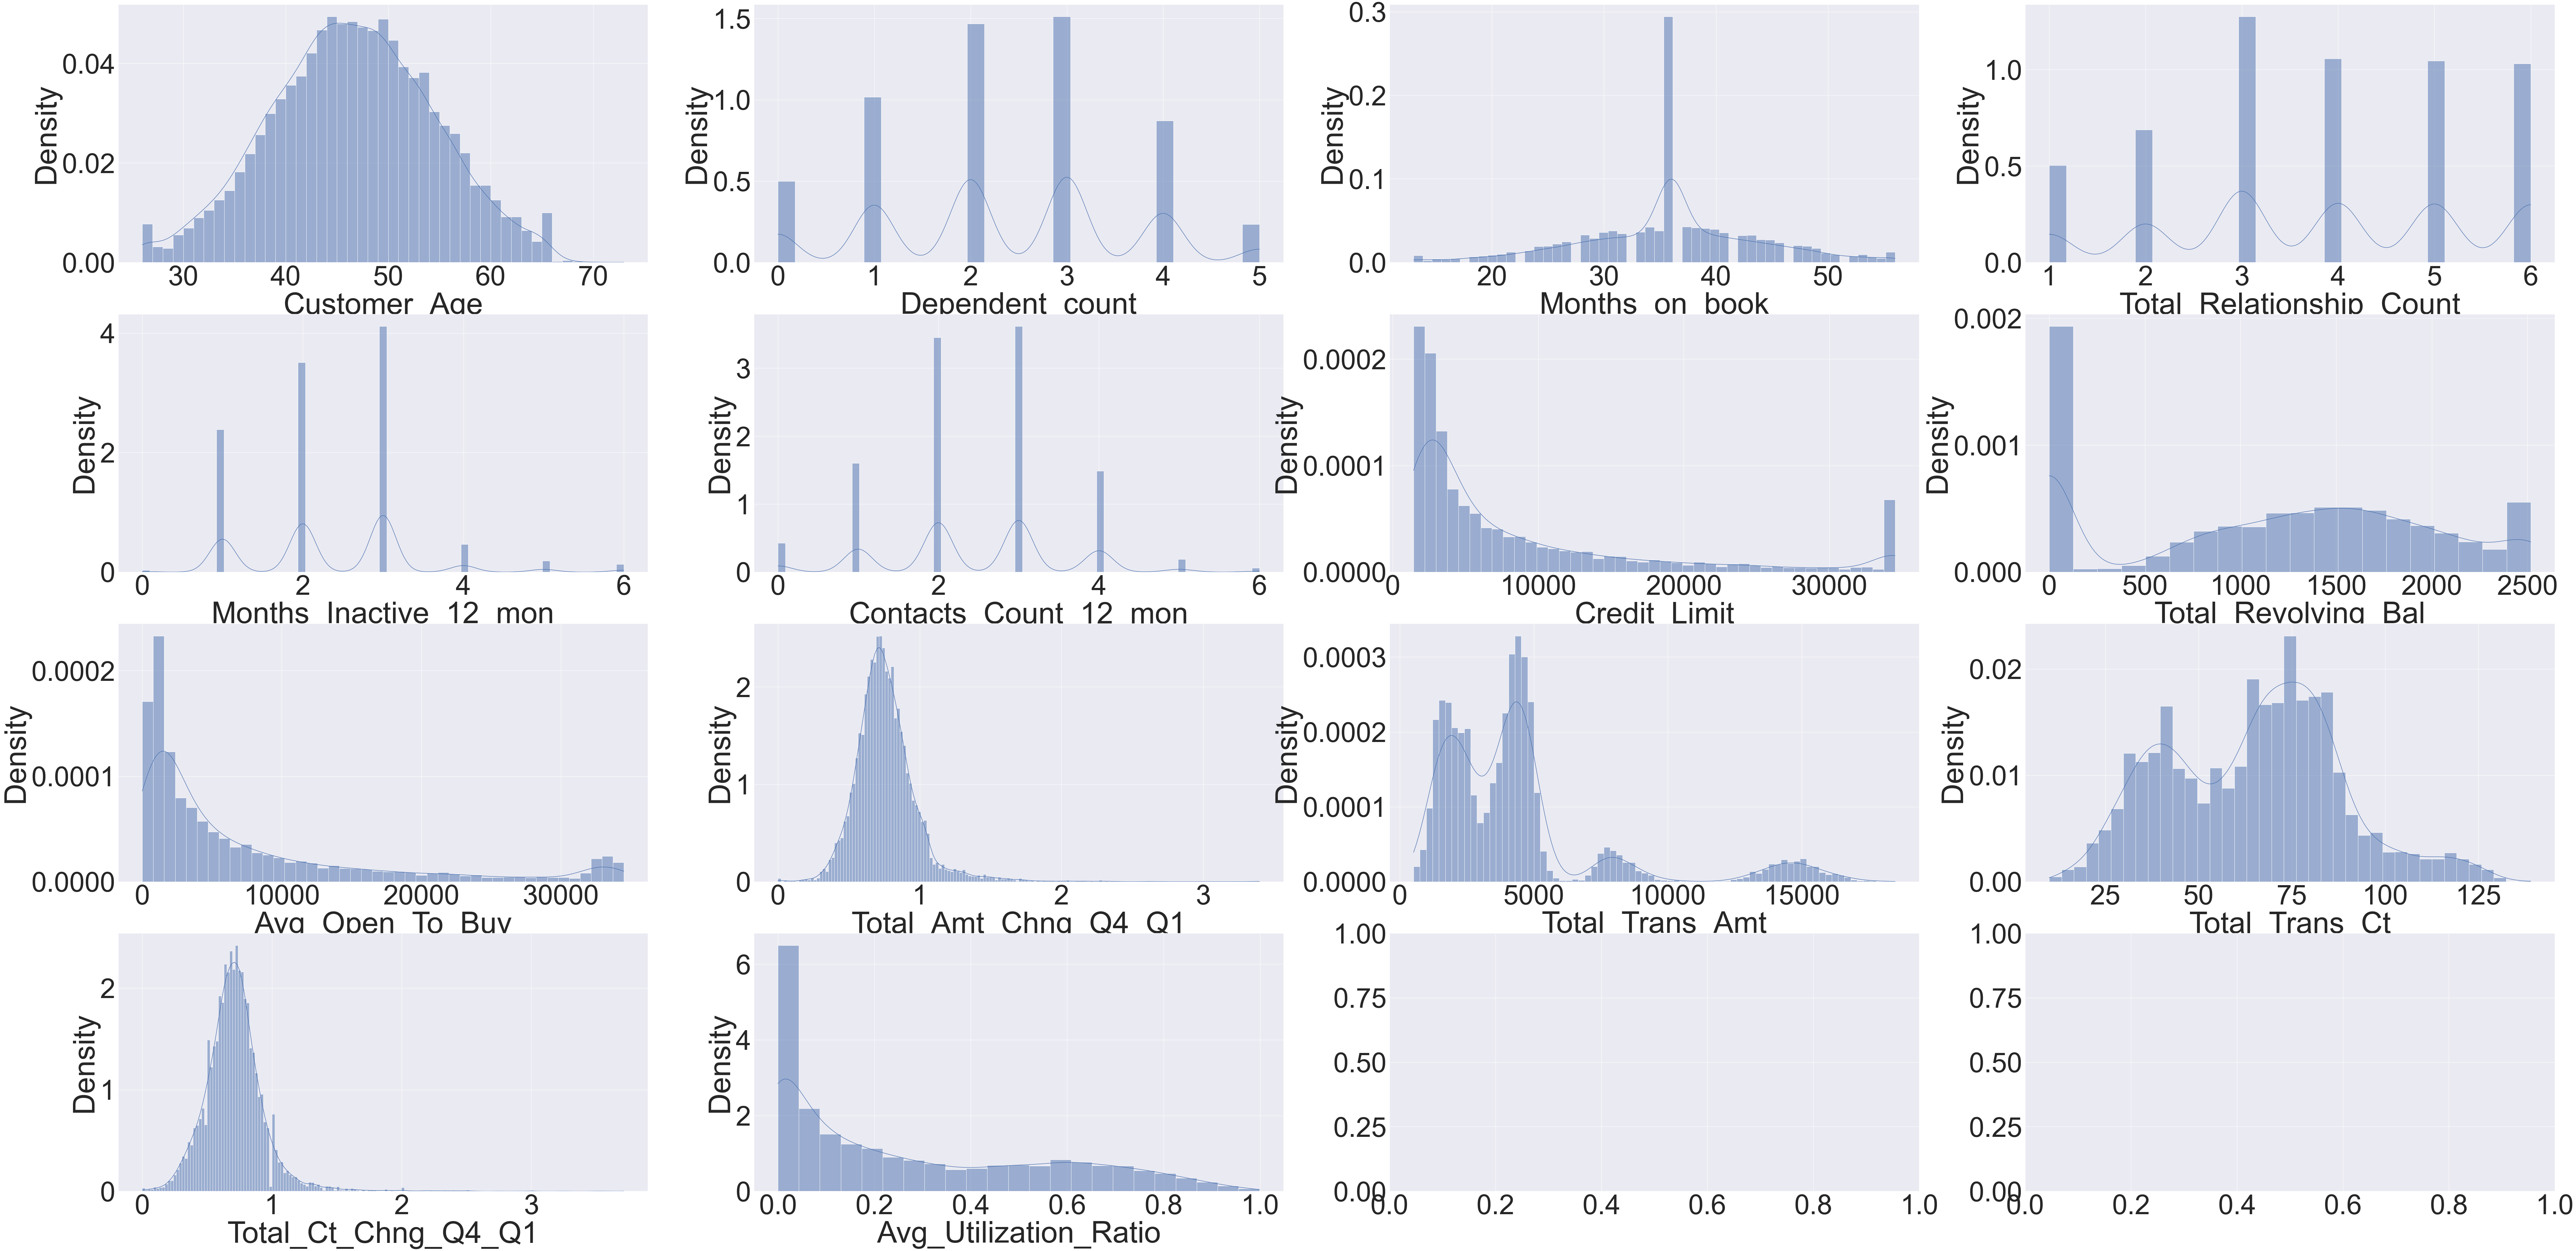

In [369]:
n = len(numerical_cols)
sns.set(font_scale=8) 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10*n,5*n) )

for i in range(n):
    j = i//4
    k = i % 4
    sns.histplot(df[numerical_cols[i]],kde=True, stat='density', ax=axes[j][k])
    
    

In [361]:
#distribution
n = len(numerical_cols)
sns.set(font_scale=8) 

fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10*n,40*n) )

for i in range(n):
    sns.histplot(df[numerical_cols[i]],kde=True, stat='density', ax=axes[i][0])
    
    sns.boxplot(x=df[numerical_cols[i]], ax=axes[i][1])

####  Observations
* The Customer_Age distribution is fairly normal but slightly left-skewed.
* The Dependent_count distribution is also fairly normal but slightly left-skewed.
* The Months_on_book distribution is fairly normal but slightly left-skewed.
* The Total_Relationship_Count distribution is fairly normal but slightly left-skewed.
* The Months_Inactive_12_mon distribution is right-skewed.
* The Contacts_Count_12_mon distribution is fairly normal but slightly right-skewed.
* The Credit_Limit distribution is very right-skewed.
* The Total_Revolving_Bal distribution is fairly normal but slightly left-skewed due to many customers with very low balances.
* The Avg_Open_To_Buy distribution is very right-skewed.
* The Total_Amt_Chng_Q4_Q1 distribution is very right-skewed.
* The Total_Trans_Amt distribution is very right-skewed.
* The Total_Trans_Ct distribution is fairly normal but slightly right-skewed.
* The Total_Ct_Chng_Q4_Q1 distribution is very right-skewed.
* The Avg_Utilization distribution is right-skewed.

<h3>2.Categorical features</h3>

In [86]:
categorical_cols = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

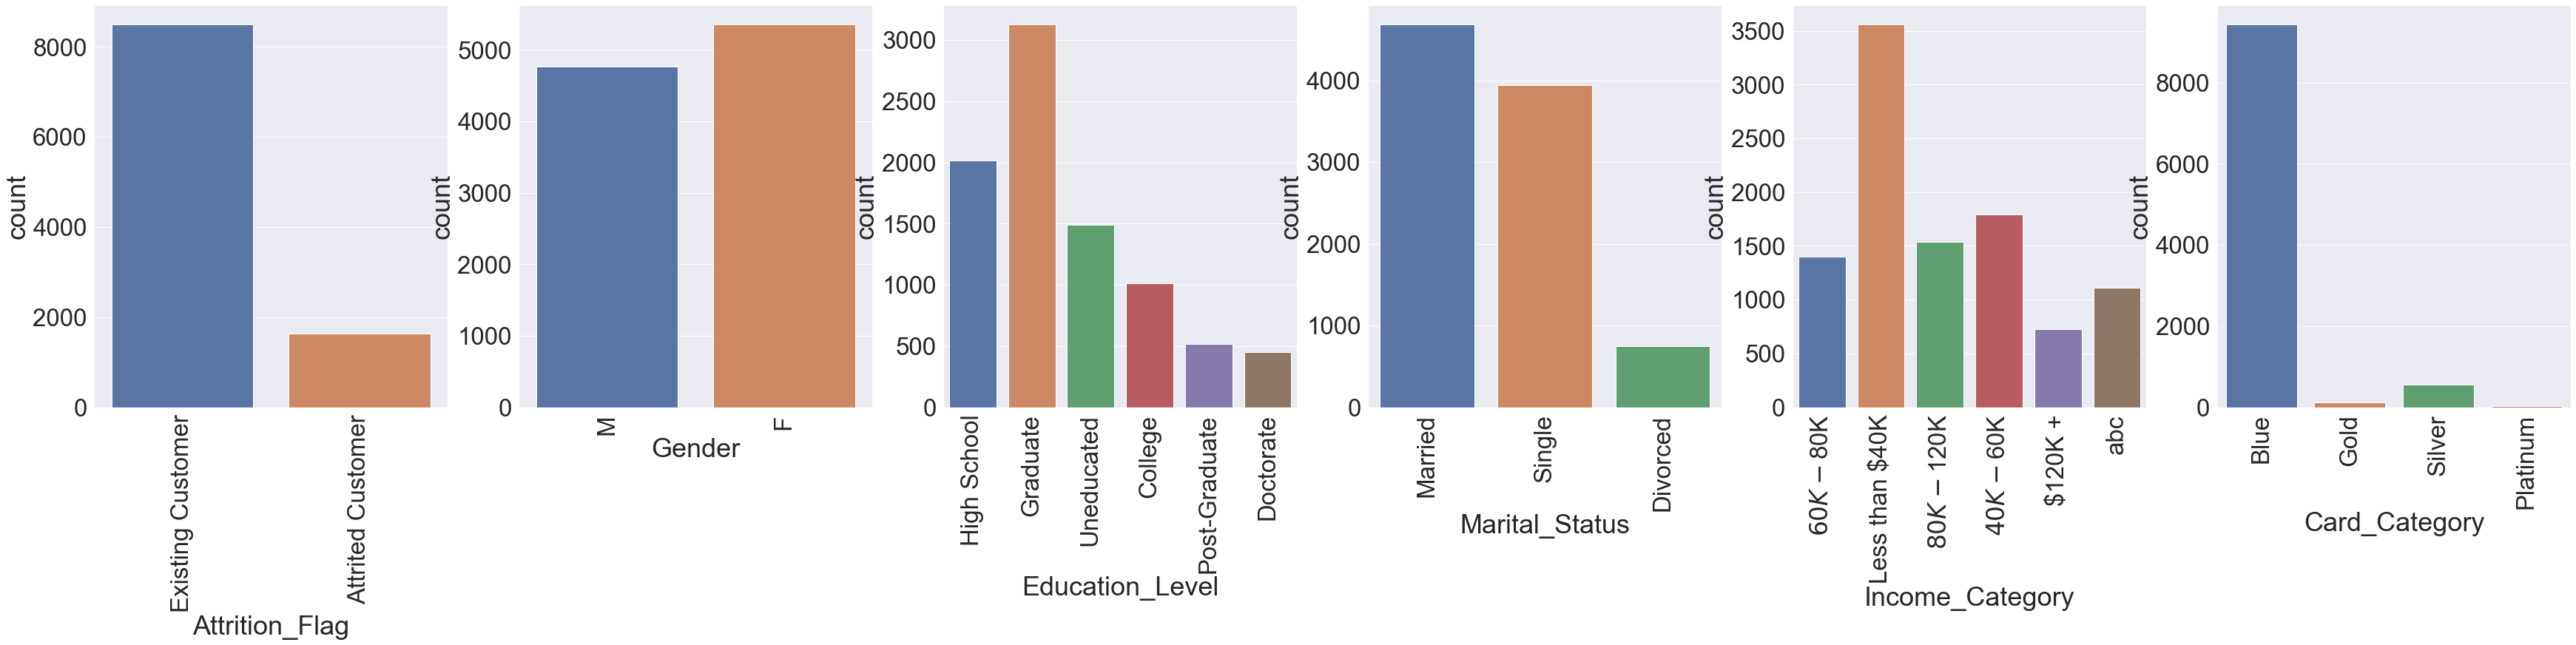

In [101]:

n = len(categorical_cols)
sns.set(font_scale=3) 

fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(10*n,10) )

for i in range(n):
    axes[i].tick_params(axis="x",labelrotation=90)
    sns.countplot(x = categorical_cols[i],data=df, ax=axes[i])
    



In [124]:
list(df['Attrition_Flag'].value_counts().to_dict().keys)

<function dict.keys>

In [140]:
ex.pie(df,names='Attrition_Flag',title='Propotion Of Different Attrition_Flag',hole=0.33)


In [139]:
ex.pie(df,names='Gender',title='Propotion Of Different Gender',hole=0.33)

In [138]:
ex.pie(df,names='Education_Level',title='Propotion Of Different Education_Level',hole=0.33)

In [137]:
ex.pie(df,names='Marital_Status',title='Propotion Of Different Marriage Statuses',hole=0.33)

In [136]:
ex.pie(df,names='Income_Category',title='Propotion Of Different Income_Category',hole=0.33)

In [135]:
ex.pie(df,names='Card_Category',title='Propotion Of Different Card_Category',hole=0.33)

####  Observations 
* **Attrition_Flag** : most of the customers is existing and then we see a much smaller number of attrited customers that closed their account.
* **Gender** : most of the customers is female, but it is not a huge difference. 
* **Education_Level** : most of the customers is Graduate. The second largest group is High-School. 
* **Marital_Status** : most customers is Married. The second largest is Single. The smallest group is those that are Divorced.
* **Income_Category** : most of the customers is less than 40K. The second largest group is the next bin up at $40K-60K. We also notice a large group of customers with an incorrect category of 'abc' that we can probably remove and treat for.  
* **Card_Category** : most of the customers is Blue. The second largest group is Silver members. If we assume that Blue is the base card then we can probably bin these categories to the 'Basic Members' and 'Premium Members'.


<h3>3.Correlation between Numerical features</h3>

<AxesSubplot:>

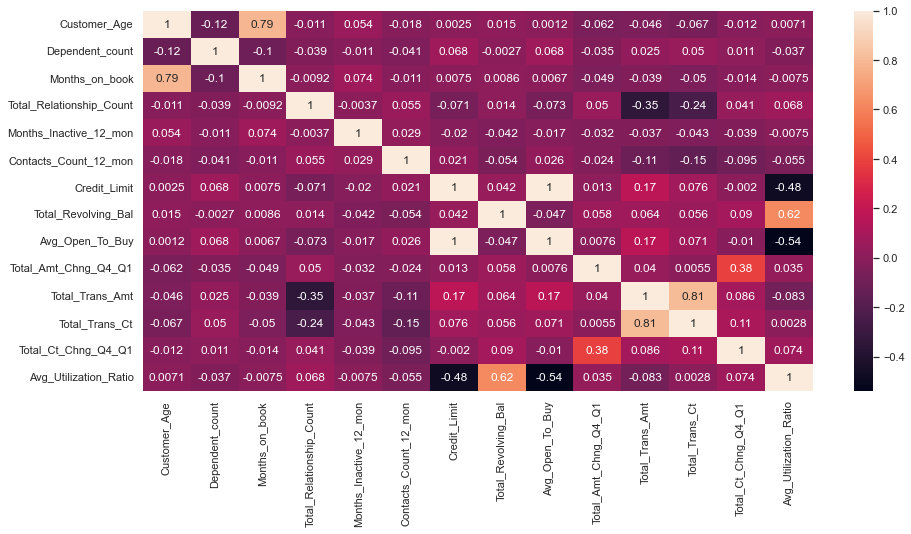

In [145]:
plt.figure(figsize=(15, 7))
sns.set(font_scale=1) 
sns.heatmap(df[numerical_cols].corr(), annot=True)

####  Observations
* We don't see many significant correlations throughout the set, except for a few noticeable exceptions.
* The most notable correlation is the direct positive correlation seen between **Credit_Limit** and **Avg_Open_To_Buy**.
* We also see very strong positive correlations between **Months_on_book** and **Customer_Age**, **Total_Trans_Amt** and **Total_Trans_Ct**, and **Total_Revolving_Bal** and **Avg_Utilization_Ratio**.
* The strongest negative correlations are seen between both **Avg_Open_To_Buy** and **Credit_Limit** with **Avg_Utilization_Ratio**.
* There are also a few other positive correlations like **Total_Ct_Chng_Q4_Q1** and **Total_Amt_Chng_Q4_Q1**, and some other negative correlations; however, these are all not as strong as the previously mentioned correlations.

<h3>4.Relationship between Attrition_Flag and Numerical features</h3>

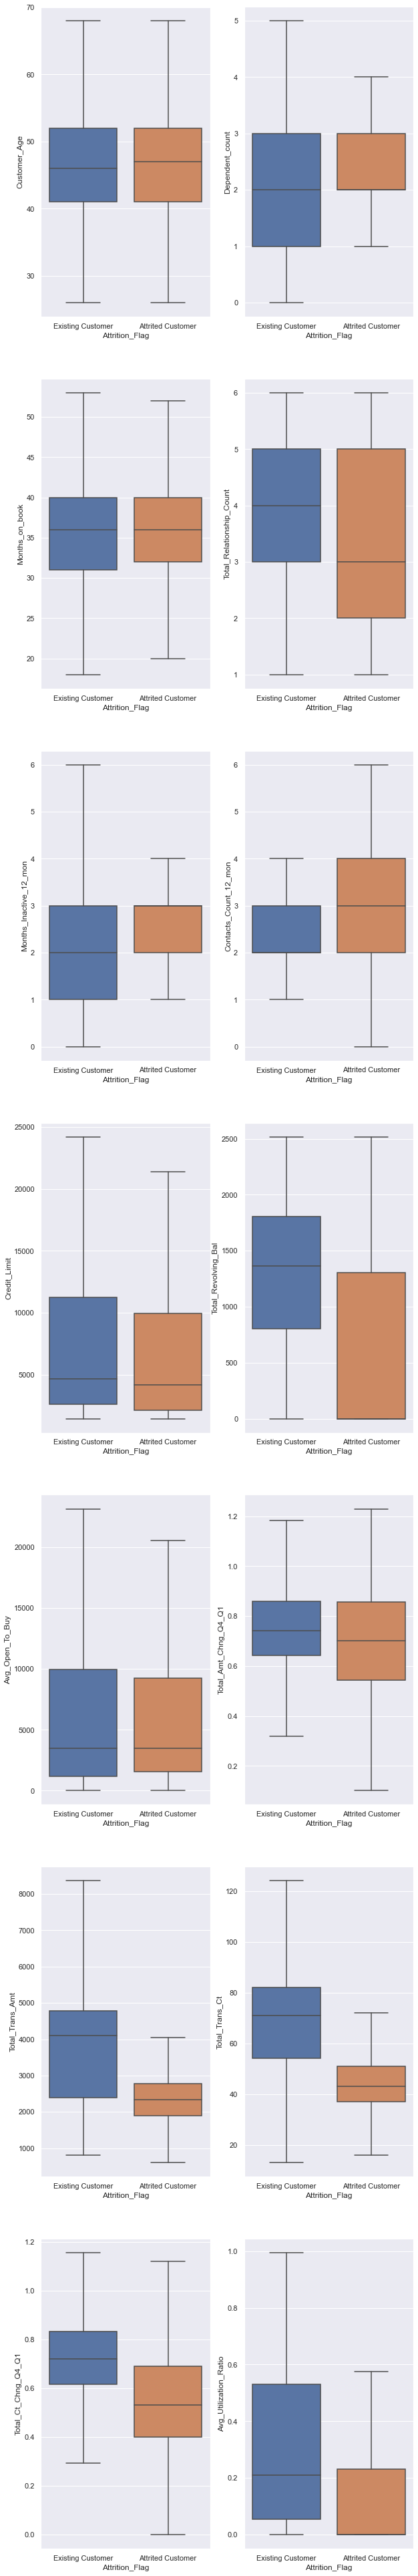

In [157]:
n = len(numerical_cols)
fig, axes = plt.subplots(nrows= 7, ncols=2, figsize=(10,5*n) )

for i in range(n):
    #axes[i].tick_params(axis="x",labelrotation=90)
    j = i //2
    k = i % 2
    sns.boxplot(x='Attrition_Flag', y=numerical_cols[i], data=df, showfliers=False, ax=axes[j][k])


In [159]:
df.groupby(["Attrition_Flag"])[numerical_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer        46.659            2.403          36.178   
Existing Customer        46.262            2.335          35.881   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                     3.280                   2.693   
Existing Customer                     3.915                   2.274   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer                  2.972      8136.039              672.823   
Existing Customer                  2.356      8726.878             1256.604   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer         7463.216                 0.694         3095.026   
Existing Customer         7470.273                 0.773         4654.656   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer          44.934                0.554                  0.162  
Existing Customer          68.673                0.742                  0.296

####  Observations 
* The most notable difference between active and closed accounts can be seen in the means for **Total_Revolving_Bal** and **Avg_Utilization_Ratio** as the existing customers have a mean nearly double that of the attrited customers.
* There is also a significant difference between the two customer types in the **Total_Trans_Amt** and **Total_Trans_Ct** as we see the existing customers have signifcantly larger means in these two columns.

<h3>5.Relationship between Attrition_Flag and Categorical features</h3>

Text(0, 0.5, 'Percentage Active/Inactive %')

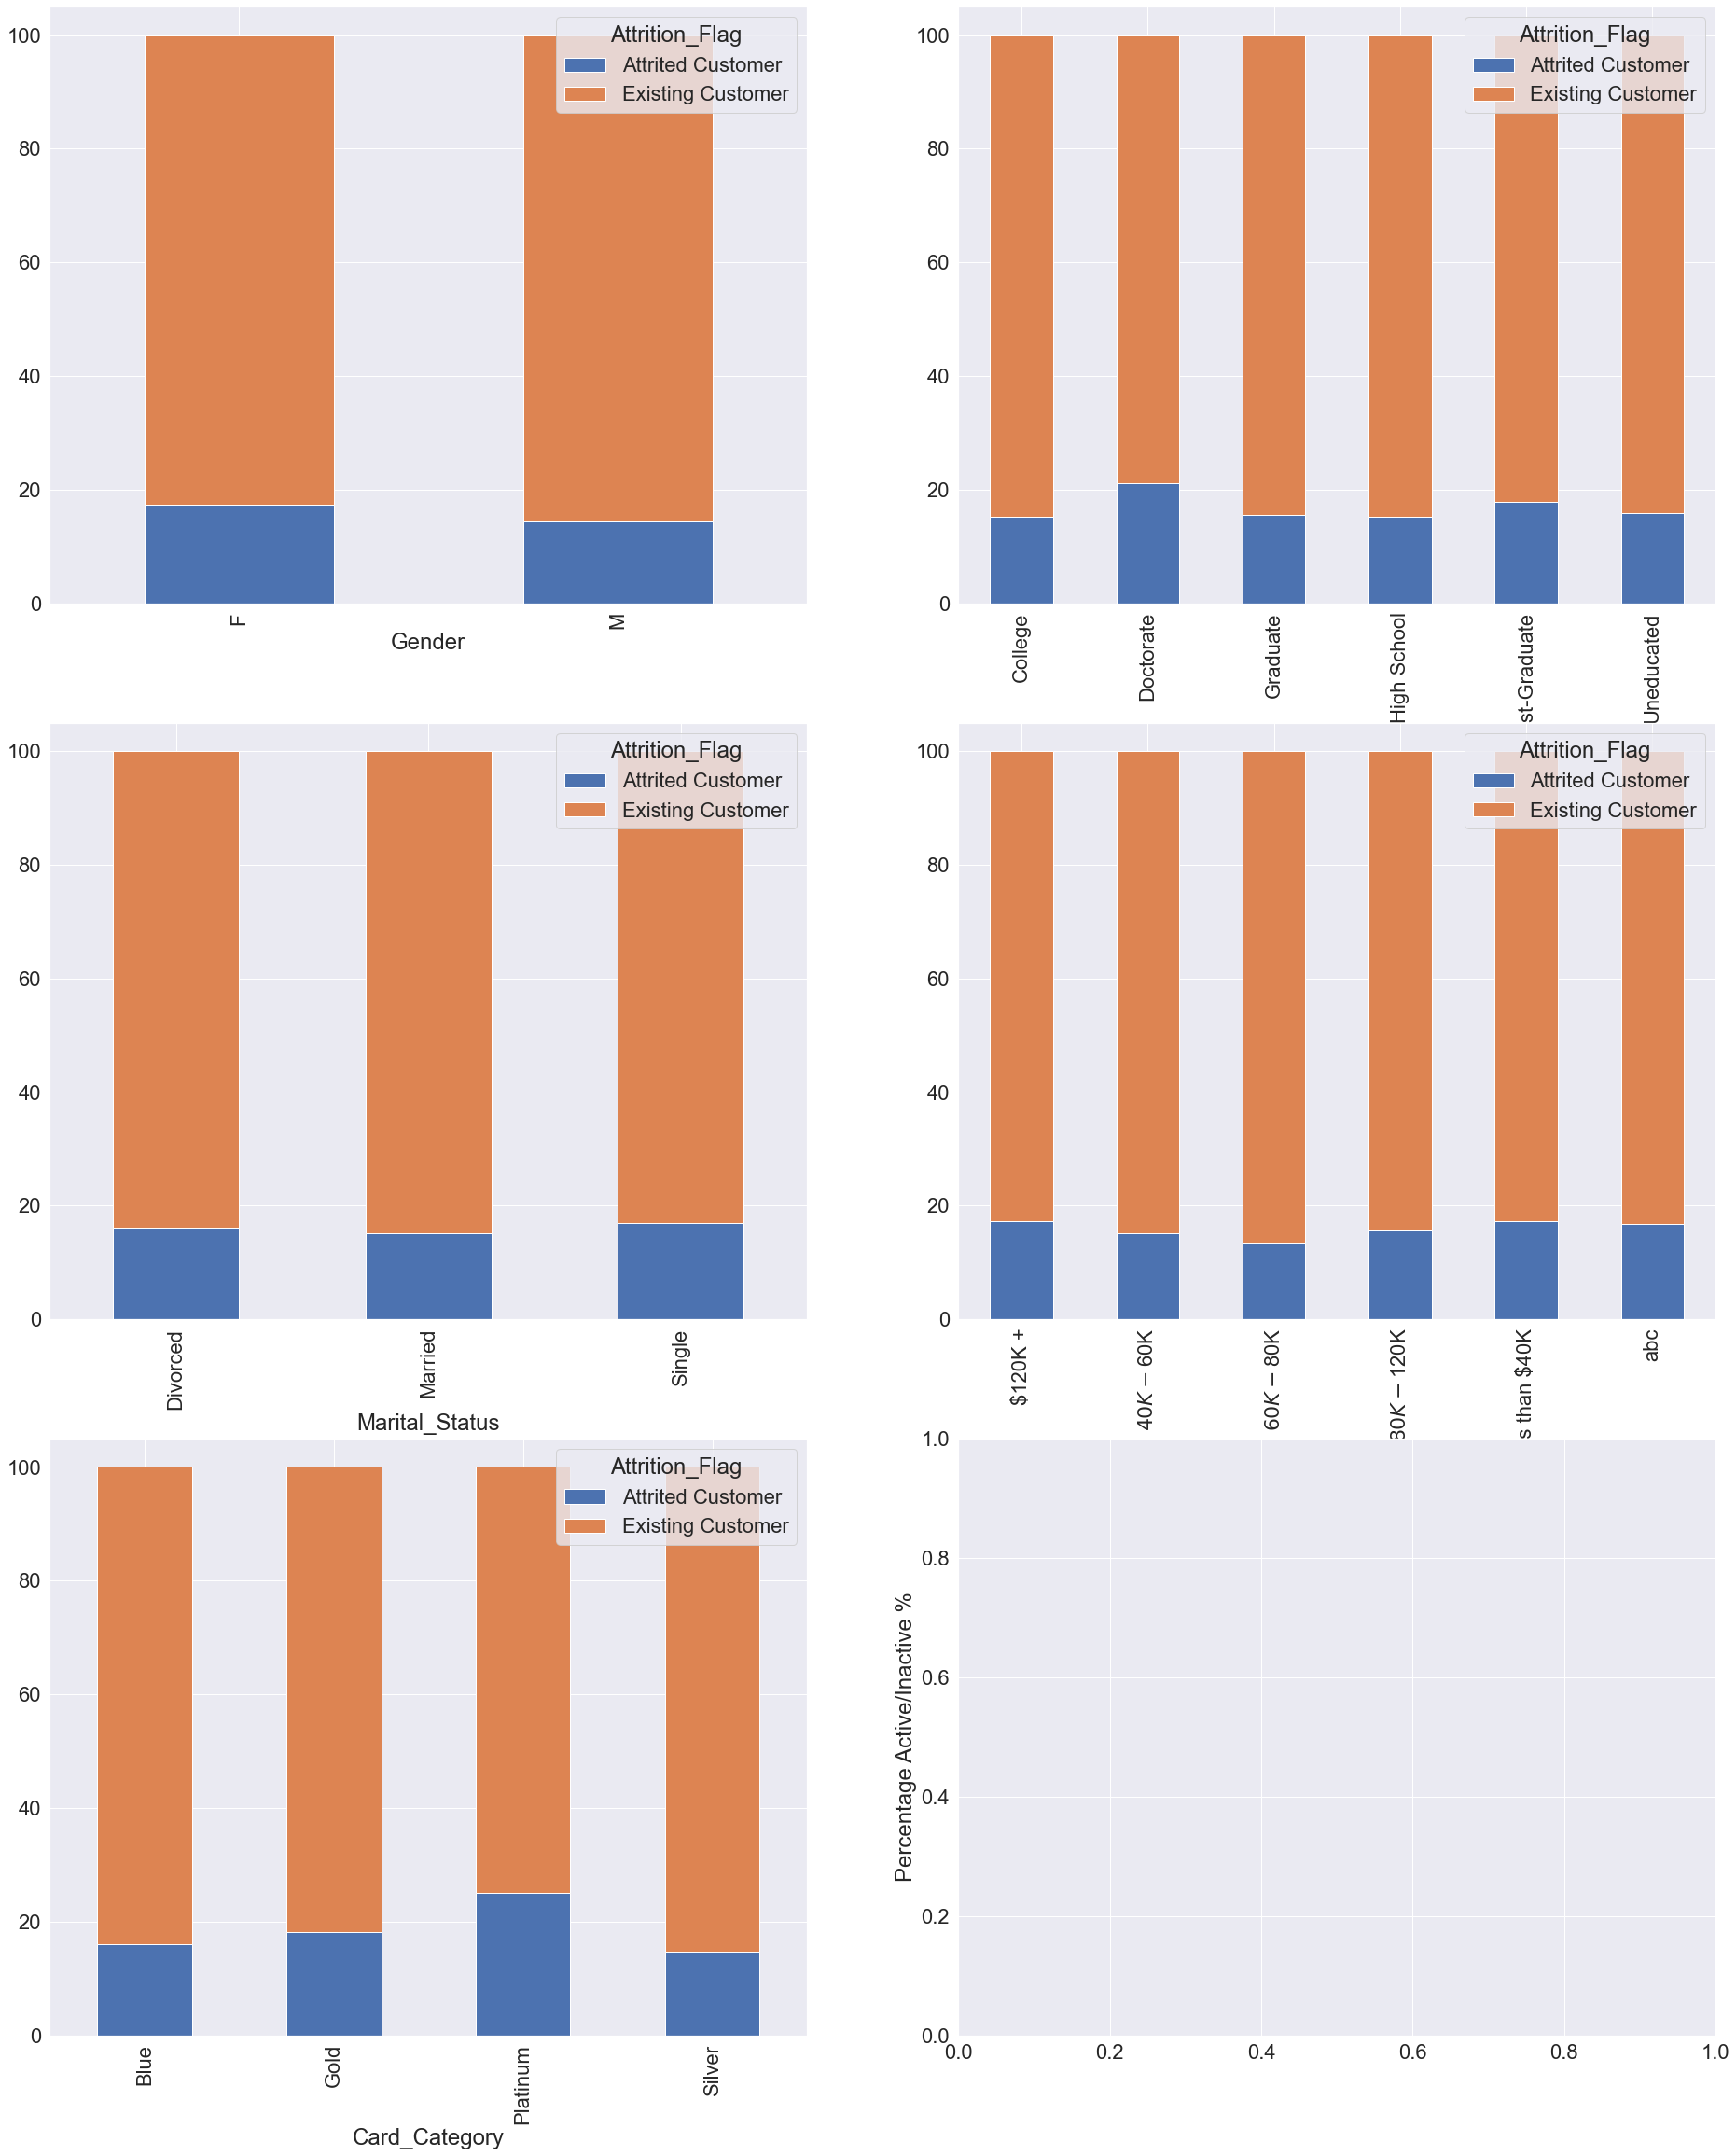

In [168]:
# Plot crosstab percentages across the categorical columns based on Attrition_Flag values
n = len(categorical_cols)
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(32, 40) )
sns.set(font_scale=2) 
(pd.crosstab(df[categorical_cols[1]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[0][0])
(pd.crosstab(df[categorical_cols[2]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[0][1])
(pd.crosstab(df[categorical_cols[3]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[1][0])
(pd.crosstab(df[categorical_cols[4]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[1][1])
(pd.crosstab(df[categorical_cols[5]], df["Attrition_Flag"], normalize="index") * 100).plot(
            kind="bar",  stacked=True, ax=axes[2][0])

plt.ylabel("Percentage Active/Inactive %")

####  Observations 
* A slightly larger percentage of women closed their accounts.
* The largest attrition rate is seen among those with a doctoral degree, but they are relatively similar across the education levels.
* The attrition rates are quite similar across marital statuses as well, but the single members do have a slightly higher percentage.
* The attrition rate is also similar across income bins, but those making <$40K have a slightly higher percentage than the others.
* The attrition rate across the card types is also quite similar, but unexpectedly we do see that the 'Platinum' members have the highest attrition rate and it is one of the most signifcant differences across any of the categorical columns.

In [364]:
pd.pivot_table(df, values=['CLIENTNUM'], columns=['Attrition_Flag'], index=['Card_Category'], aggfunc='count', margins=True)

CLIENTNUM                         
Attrition_Flag Attrited Customer Existing Customer    All
Card_Category                                            
Blue                        1519              7917   9436
Gold                          21                95    116
Platinum                       5                15     20
Silver                        82               473    555
All                         1627              8500  10127

<h3>6.Customer Observations</h3>

In [ ]:
#cu

####  Customer Observations 
* A slightly larger percentage of women closed their accounts.
* The largest attrition rate is seen among those with a doctoral degree, but they are relatively similar across the education levels.
* The attrition rates are quite similar across marital statuses as well, but the single members do have a slightly higher percentage.
* The attrition rate is also similar across income bins, but those making <$40K have a slightly higher percentage than the others.
* The attrition rate across the card types is also quite similar, but unexpectedly we do see that the 'Platinum' members have the highest attrition rate and it is one of the most signifcant differences across any of the categorical columns.

<h2>Feature Engineering</h2>

<h3>Change the column **Attrition_Flag** to 0 or 1 </h3>

In [215]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['Attrition_Flag'])
df = df.drop('Attrition_Flag', axis=1)

<h3>Drop the column **CLIENTNUM** as it is unique for each customer and will not add value to the model</h3>

In [216]:
df.drop(columns=["CLIENTNUM"], inplace=True)


In [217]:
df.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Unknown   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  class  
0                  0.061      1  
1                  0.105      1  
2                  0.000      1  
3                  0.760      1  
4                  0.000      1

In [219]:
data = deepcopy(df)

In [222]:
categorical_cols.remove('Attrition_Flag')

<h3>Change the categorical features to one hot encoding</h3>

In [223]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

for feature in categorical_cols:
    data = encode_and_bind(data, feature)

In [224]:
data.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777        11914.000                 1.335  ...   
1                  864         7392.000                 1.541  ...   
2                    0         3418.000                 2.594  ...   
3                 2517          796.000                 1.405  ...   
4                    0         4716.000                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

<h3>Generate X and y</h3>

In [226]:
X = data.drop(columns="class")

y = data["class"]

In [227]:
X.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777        11914.000                 1.335  ...   
1                  864         7392.000                 1.541  ...   
2                    0         3418.000                 2.594  ...   
3                 2517          796.000                 1.405  ...   
4                    0         4716.000                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 37 columns]

In [228]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

<h3>Splitting the data into train/test</h3>

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

<h2>Model Building</h2>

In [232]:
models = []  # Empty list to store all the models

# Appending models into the list with default parameters and random_state=1
models.append(("LogisticRegression", LogisticRegression(random_state=1234)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1234)))
models.append(("Bagging", BaggingClassifier(random_state=1234)))
models.append(("RandomForest", RandomForestClassifier(random_state=1234)))
models.append(("GBM", GradientBoostingClassifier(random_state=1234)))
models.append(("XGB",  XGBClassifier(random_state=1234)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1234)))


print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) 
    print("{}: {}".format(name, scores))
    



Training Performance:

LogisticRegression: 0.9581922567348742
DecisionTree: 1.0
Bagging: 0.9982334756366849
RandomForest: 1.0
GBM: 0.9907257470925953
XGB: 1.0
Adaboost: 0.982776387457677


In [241]:
print("\n" "Test Performance:(recall     auc)" "\n")
for name, model in models:
    y_pred =model.predict(X_test)
    scores = recall_score(y_test, y_pred) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)  
    print("{}: {}\t{}".format(name, scores, metrics.auc(fpr, tpr)))



Test Performance:(recall     auc)

LogisticRegression: 0.9601640304628002	0.7465396954821838
DecisionTree: 0.9648506151142355	0.8930836147671491
Bagging: 0.9765670767428236	0.9302898079638883
RandomForest: 0.9859402460456942	0.8926566433990228
GBM: 0.9888693614528412	0.9129299785320634
XGB: 0.9894551845342706	0.9288968712640004
Adaboost: 0.9847685998828354	0.9093121996279381


<h2>Customer Segmentation</h2>

In [249]:
df.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Unknown   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  class  
0                  0.061      1  
1                  0.105      1  
2                  0.000      1  
3                  0.760      1  
4                  0.000      1

In [251]:
#use label coding instead of one-hot encoding to reduce the number of features
seg_data = deepcopy(df)

le = LabelEncoder()
for feature in categorical_cols:
    seg_data[feature] = le.fit_transform(seg_data[feature])


In [258]:
seg_data['CLIENTNUM'] = df['CLIENTNUM']

In [259]:
seg_data.head()

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            45       1                3                3               1   
1            49       0                5                2               2   
2            51       1                3                2               1   
3            40       0                4                3               3   
4            40       1                3                5               1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                2              0              39                         5   
1                4              0              44                         6   
2                3              0              36                         4   
3                4              0              34                         3   
4                2              0              21                         5   

   Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                       1  ...     12691.000                  777   
1                       1  ...      8256.000                  864   
2                       1  ...      3418.000                    0   
3                       4  ...      3313.000                 2517   
4                       1  ...      4716.000                    0   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0        11914.000                 1.335             1144              42   
1         7392.000                 1.541             1291              33   
2         3418.000                 2.594             1887              20   
3          796.000                 1.405             1171              20   
4         4716.000                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  class  CLIENTNUM  
0                1.625                  0.061      1  768805383  
1                3.714                  0.105      1  818770008  
2                2.333                  0.000      1  713982108  
3                2.333                  0.760      1  769911858  
4                2.500                  0.000      1  709106358  

[5 rows x 21 columns]

In [280]:
# get the customers churned
churn = seg_data[seg_data['class']==0]

In [281]:
churn.shape

(1627, 21)

In [282]:
churn.describe()

Customer_Age   Gender  Dependent_count  Education_Level  \
count      1627.000 1627.000         1627.000         1627.000   
mean         46.659    0.428            2.403            3.120   
std           7.666    0.495            1.275            1.851   
min          26.000    0.000            0.000            0.000   
25%          41.000    0.000            2.000            2.000   
50%          47.000    0.000            2.000            3.000   
75%          52.000    1.000            3.000            5.000   
max          68.000    1.000            5.000            6.000   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
count        1627.000         1627.000       1627.000        1627.000   
mean            1.495            2.924          0.170          36.178   
std             0.747            1.520          0.671           7.797   
min             0.000            0.000          0.000          13.000   
25%             1.000            2.000          0.000          32.000   
50%             1.000            3.000          0.000          36.000   
75%             2.000            4.000          0.000          40.000   
max             3.000            5.000          3.000          56.000   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  Credit_Limit  \
count                  1627.000                1627.000  ...      1627.000   
mean                      3.280                   2.693  ...      8136.039   
std                       1.578                   0.900  ...      9095.334   
min                       1.000                   0.000  ...      1438.300   
25%                       2.000                   2.000  ...      2114.000   
50%                       3.000                   3.000  ...      4178.000   
75%                       5.000                   3.000  ...      9933.500   
max                       6.000                   6.000  ...     34516.000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
count             1627.000         1627.000              1627.000   
mean               672.823         7463.216                 0.694   
std                921.386         9109.208                 0.215   
min                  0.000            3.000                 0.000   
25%                  0.000         1587.000                 0.544   
50%                  0.000         3488.000                 0.701   
75%               1303.500         9257.500                 0.856   
max               2517.000        34516.000                 1.492   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
count         1627.000        1627.000             1627.000   
mean          3095.026          44.934                0.554   
std           2308.228          14.568                0.227   
min            510.000          10.000                0.000   
25%           1903.500          37.000                0.400   
50%           2329.000          43.000                0.531   
75%           2772.000          51.000                0.692   
max          10583.000          94.000                2.500   

       Avg_Utilization_Ratio    class     CLIENTNUM  
count               1627.000 1627.000      1627.000  
mean                   0.162    0.000 735261381.264  
std                    0.264    0.000  35577253.360  
min                    0.000    0.000 708083283.000  
25%                    0.000    0.000 712371258.000  
50%                    0.000    0.000 716564433.000  
75%                    0.231    0.000 768373683.000  
max                    0.999    0.000 828294933.000  

[8 rows x 21 columns]

In [269]:
churn.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'class', 'CLIENTNUM'],
      dtype='object')

In [287]:
#churn_class = pd.DataFrame(StandardScaler().fit_transform(churn), columns=churn.columns)

#only scale numeric features
categorical_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [323]:
churn_class = pd.DataFrame(StandardScaler().fit_transform(churn[numerical_cols]), columns=numerical_cols)



In [324]:
churn_class[categorical_cols] = seg_data[categorical_cols]


In [334]:
churn

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
21               62       0                0                2               1   
39               66       0                0                1               1   
51               54       0                1                2               1   
54               56       1                2                2               1   
61               48       1                2                2               1   
...             ...     ...              ...              ...             ...   
10119            55       0                3                5               2   
10123            41       1                2                6               0   
10124            44       0                1                3               1   
10125            30       1                2                2               3   
10126            43       0                2                2               1   

       Income_Category  Card_Category  Months_on_book  \
21                   4              0              49   
39                   5              0              56   
51                   4              0              40   
54                   0              0              36   
61                   2              3              35   
...                ...            ...             ...   
10119                5              0              47   
10123                1              0              25   
10124                4              0              36   
10125                1              0              36   
10126                4              3              25   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  Credit_Limit  \
21                            2                       3  ...      1438.300   
39                            5                       4  ...      7882.000   
51                            2                       3  ...      1438.300   
54                            1                       3  ...     15769.000   
61                            2                       4  ...     34516.000   
...                         ...                     ...  ...           ...   
10119                         4                       3  ...     14657.000   
10123                         4                       2  ...      4277.000   
10124                         5                       3  ...      5409.000   
10125                         4                       3  ...      5281.000   
10126                         6                       2  ...     10388.000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
21                       0         1438.300                 1.047   
39                     605         7277.000                 1.052   
51                     808          630.300                 0.997   
54                       0        15769.000                 1.041   
61                       0        34516.000                 0.763   
...                    ...              ...                   ...   
10119                 2517        12140.000                 0.166   
10123                 2186         2091.000                 0.804   
10124                    0         5409.000                 0.819   
10125                    0         5281.000                 0.535   
10126                 1961         8427.000                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
21                 692              16                0.600   
39                 704              16                0.143   
51                 705              19                0.900   
54                 602              15                0.364   
61                 691              15                0.500   
...                ...             ...                  ...   
10119             6009              53                0.514   
10123             8764              69                0.683   
10124           

In [339]:
churn_class_no_scale = deepcopy(churn)
#churn_class_no_scale.drop('CLIENTNUM')
#churn_class_no_scale.drop('class')
churn_class_no_scale.drop(columns=["CLIENTNUM"], inplace=True)
churn_class_no_scale.drop(columns=["class"], inplace=True)
churn_class_no_scale

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
21               62       0                0                2               1   
39               66       0                0                1               1   
51               54       0                1                2               1   
54               56       1                2                2               1   
61               48       1                2                2               1   
...             ...     ...              ...              ...             ...   
10119            55       0                3                5               2   
10123            41       1                2                6               0   
10124            44       0                1                3               1   
10125            30       1                2                2               3   
10126            43       0                2                2               1   

       Income_Category  Card_Category  Months_on_book  \
21                   4              0              49   
39                   5              0              56   
51                   4              0              40   
54                   0              0              36   
61                   2              3              35   
...                ...            ...             ...   
10119                5              0              47   
10123                1              0              25   
10124                4              0              36   
10125                1              0              36   
10126                4              3              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
21                            2                       3   
39                            5                       4   
51                            2                       3   
54                            1                       3   
61                            2                       4   
...                         ...                     ...   
10119                         4                       3   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
21                         3      1438.300                    0   
39                         3      7882.000                  605   
51                         1      1438.300                  808   
54                         3     15769.000                    0   
61                         4     34516.000                    0   
...                      ...           ...                  ...   
10119                      3     14657.000                 2517   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
21            1438.300                 1.047              692              16   
39            7277.000                 1.052              704              16   
51             630.300                 0.997              705              19   
54           15769.000                 1.041              602              15   
61           34516.000                 0.763              691              15   
...                ...                   ...              ...             ...   
10119        12140.000                 0.166             6009              53   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000   

In [340]:
score = []
inertia = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(churn_class_no_scale)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(churn_class_no_scale, kmeans.labels_,sample_size=128, metric='euclidean'))



In [350]:
score

[0.7776973027351722,
 0.6462278463860327,
 0.5991022390347767,
 0.45206394083899304,
 0.5509975784424073,
 0.5662036784967193,
 0.4117970735814586,
 0.4381373477023068]

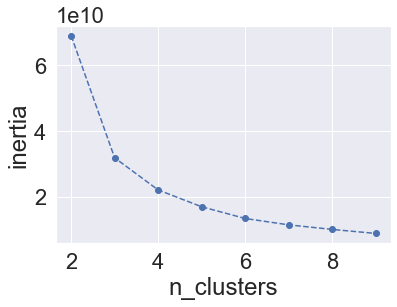

In [341]:
n_clusters = range(2, 10)
plt.plot(n_clusters, inertia, "bo--")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

In [348]:
k = 6

kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(churn_class_no_scale)
print(kmeans.labels_)

[5 2 5 ... 1 1 1]


In [349]:
labels = pd.DataFrame(kmeans.labels_,columns=["label"])
centers = pd.DataFrame(kmeans.cluster_centers_,columns=churn_class_no_scale.columns)
labels_count = pd.DataFrame(labels.value_counts(),columns=["count"]).sort_index()
labels_count = labels_count.reset_index()
final = pd.concat([labels_count,centers],axis=1)
final["class_label"] = ["class_1","class_2","class_3","class_4", "class_5", "class_6"]
final

label  count  Customer_Age  Gender  Dependent_count  Education_Level  \
0      0     73        46.822   0.890            2.548            3.521   
1      1    126        44.468   0.563            2.278            3.286   
2      2    258        47.669   0.533            2.447            2.996   
3      3    121        47.645   0.893            2.595            3.149   
4      4    170        46.606   0.718            2.347            2.935   
5      5    879        46.540   0.220            2.380            3.131   

   Marital_Status  Income_Category  Card_Category  Months_on_book  ...  \
0           1.438            2.178          0.301          36.411  ...   
1           1.516            2.746          0.071          33.746  ...   
2           1.440            2.732          0.047          37.105  ...   
3           1.628            2.050          1.298          36.843  ...   
4           1.459            2.500          0.453          36.365  ...   
5           1.501            3.270         -0.000          36.109  ...   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                  3.247     23509.658              572.411        22937.247   
1                  2.937      5867.849              681.413         5186.437   
2                  2.907      7842.545              659.097         7183.447   
3                  3.008     33629.950              684.364        32945.587   
4                  3.029     14372.788              661.647        13711.141   
5                  2.958      2560.966              684.503         1876.463   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 0.707         3990.274          49.479                0.596   
1                 0.855         8287.524          68.889                0.798   
2                 0.664         2145.903          39.132                0.498   
3                 0.752         4544.512          52.099                0.586   
4                 0.694         3708.171          48.288                0.568   
5                 0.671         2236.724          41.188                0.526   

   Avg_Utilization_Ratio  class_label  
0                  0.024      class_1  
1                  0.119      class_2  
2                  0.081      class_3  
3                  0.020      class_4  
4                  0.046      class_5  
5                  0.246      class_6  

[6 rows x 22 columns]